# Automobile Dataset

1. This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

2. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

3. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

### Project goal: exploratory data analysis.

# 1. Download libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# 2. Import dataset

In [2]:
url = '/kaggle/input/automobile-dataset-cleaned/Automobile_dataset_cleaned.csv'

In [3]:
df = pd.read_csv(url)

# 3. Analyzing Individual Feature Patterns Using Visualization

In [4]:
# Observe the first rows of the dataset:

df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [5]:
# List the data types for each column:

print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


(0.0, 53201.67063482169)

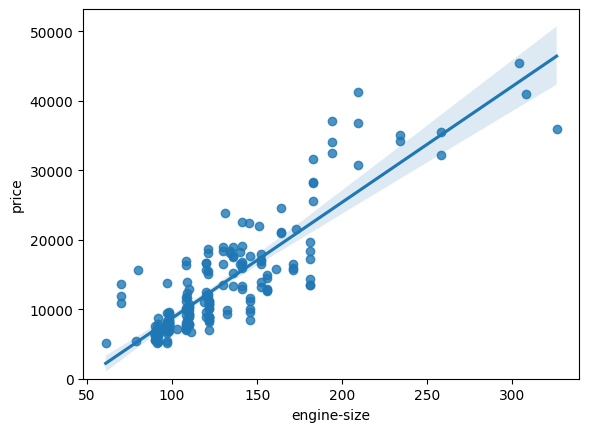

In [6]:
# Find the scatterplot of "engine-size" and "price":

sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

### Conclusion:
As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [7]:
# Examine the correlation between 'engine-size' and 'price':

df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

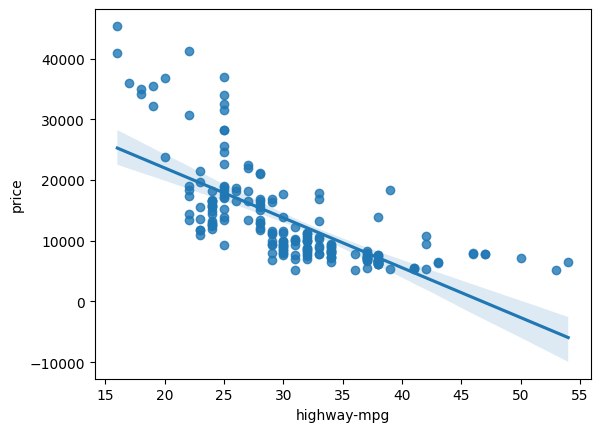

In [8]:
# Find the scatterplot of "highway-mpg" and "price":

sns.regplot(x="highway-mpg", y="price", data=df)

### Conclusion:
As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [9]:
# Examine the correlation between 'highway-mpg' and 'price':
    
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

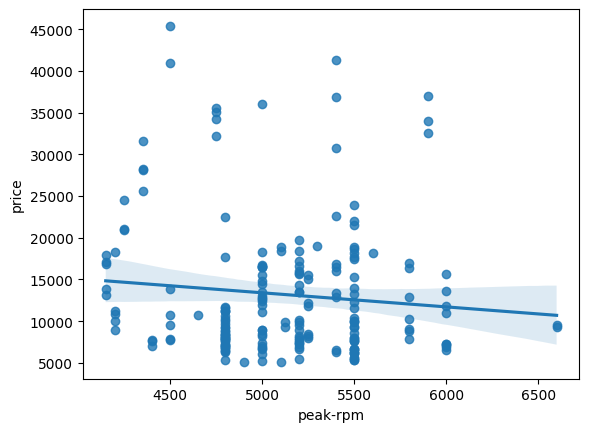

In [10]:
# Find the scatterplot of "peak-rpm" and "price":

sns.regplot(x="peak-rpm", y="price", data=df)

### Conclusion:
Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.  

In [11]:
# Examine the correlation between 'peak-rpm' and 'price':

df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<Axes: xlabel='stroke', ylabel='price'>

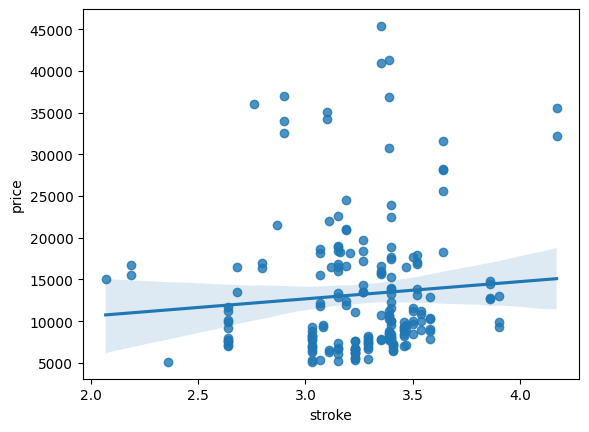

In [12]:
# Find the scatterplot of "stroke" and "price":

sns.regplot(x="stroke", y="price", data=df)

### Conclusion:
There is a weak correlation between the variable 'stroke' and 'price.' as such regression will not work well. 

In [13]:
# Find the correlation between "stroke" and "price":

df[["stroke","price"]].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<Axes: xlabel='body-style', ylabel='price'>

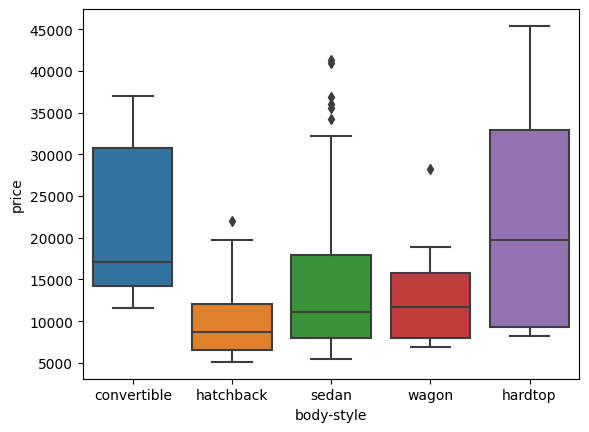

In [14]:
# Look at the relationship between "body-style" and "price":

sns.boxplot(x="body-style", y="price", data=df)

### Conclusion:
We see that the distributions of price between the different body-style categories have a significant overlap, so body-style would not be a good predictor of price.

<Axes: xlabel='engine-location', ylabel='price'>

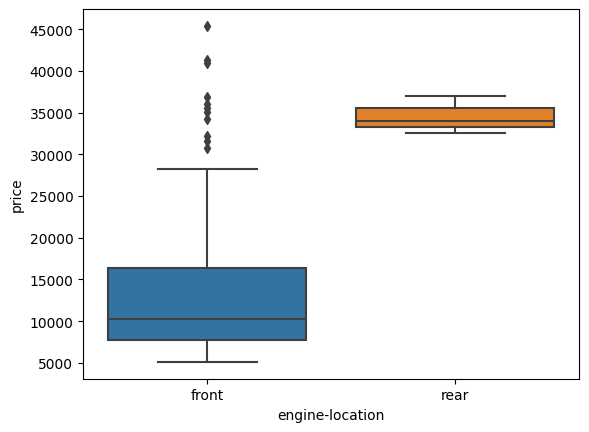

In [15]:
# Look at the relationship between "engine-location" and "price":

sns.boxplot(x="engine-location", y="price", data=df)

### Conclusion:
Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

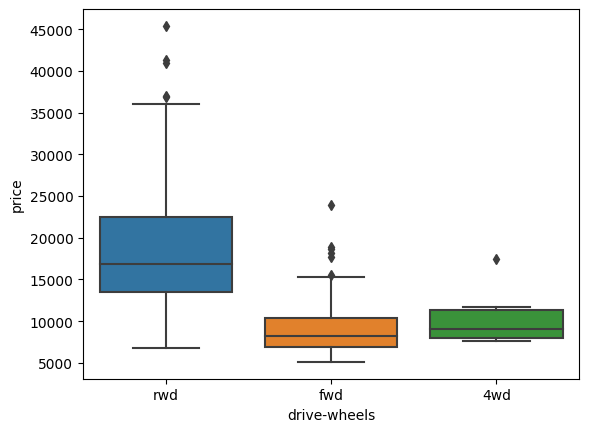

In [16]:
# Look at the relationship between "drive-wheels" and "price":

sns.boxplot(x="drive-wheels", y="price", data=df)

### Conclusion:
Here we see that the distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

# 4. Descriptive Statistical Analysis

In [17]:
# Check the statistics of variables:

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [18]:
# Check the statistics of 'object' type variables:

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [19]:
# Check the values in the column "drive-wheels":

df['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [20]:
# Convert the series to a dataframe:

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [21]:
# Rename the column 'drive-wheels' to 'value_counts':

drive_wheels_counts.rename(columns={'drive-wheels' : 'value_counts'}, inplace=True)

In [22]:
# Rename the index to 'drive-wheels':

drive_wheels_counts.index.name = 'drive-wheels'

In [23]:
# Repeat the above process for the variable 'engine-location':

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,count
engine-location,
front,198
rear,3


### Conclusion:
After examining the value counts of the engine location, we see that engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, so this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

# 5. Grouping and Pivot Tables

In [24]:
# Check unique values in the column 'drive-wheels':

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [25]:
# Select the columns 'drive-wheels' and 'price', then assign it to the "df_group_one":

df_group_one = df[['drive-wheels', 'price']]

In [26]:
# Calculate the average price for each of the different categories of data:

df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()

In [27]:
# Check the result:

df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


### Conclusion:
From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [28]:
# Let's group by both 'drive-wheels' and 'body-style'.

# Select the columns 'drive-wheels','body-style' and 'price', then assign it to the "df_gptest":

df_gptest = df[['drive-wheels','body-style','price']]

In [29]:
# Calculate the average price:

grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [30]:
# Check the result:

grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [31]:
# Convert the dataframe to a pivot table:

grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')

In [32]:
# Check the result:

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [33]:
# Fill missing values with 0:

grouped_pivot = grouped_pivot.fillna(0)

In [34]:
# Check the result:

grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [35]:
# Find the average "price" of each car based on "body-style":

df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


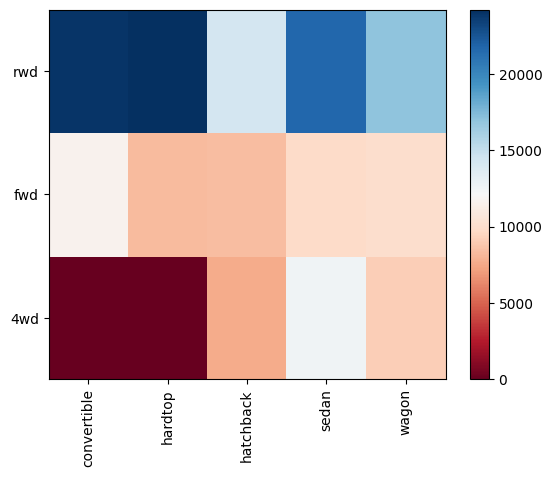

In [36]:
# Use a heat map to visualize the relationship between Drive Wheels and Body Style vs Price:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# 6. Correlation

In [37]:
# Calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price':

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).

In [38]:
# Calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price':

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428259557e-48


### Conclusion: 
Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

In [39]:
# Calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price':

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483638  with a P-value of P =  8.016477466159723e-30


### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [40]:
# Calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048206e-38


### Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [41]:
# Calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702843  with a P-value of P =  2.189577238893965e-53


### Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [42]:
# Calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [43]:
# Calculate the Pearson Correlation Coefficient and P-value of 'bore' and 'price':
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935315e-17


### Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [44]:
# Calculate the Pearson Correlation Coefficient and P-value of 'city-mpg' and 'price':
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.3211320655675098e-29


### Conclusion:
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.

In [45]:
# Calculate the Pearson Correlation Coefficient and P-value of 'highway-mpg' and 'price':
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.749547114447557e-31


### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

# Conclusion:

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore'.

Categorical variables: 'drive-wheels'.

As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.